#**Install Library**
Install Library yang dibutuhkan dalam Exploratory Spatial Data Analysis (ESDA)

In [ ]:
# Install GDAL and Geopandas
!apt install gdal-bin python-gdal python3-gdal --quiet
!apt install python3-rtree --quiet
!pip install git+git://github.com/geopandas/geopandas.git --quiet
!pip install descartes --quiet

# Install Pysal - Spatial Statistics
!pip install pysal --quiet
!pip install splot --quiet

Reading package lists...
Building dependency tree...
Reading state information...
Package python-gdal is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source
However the following packages replace it:
  gdal-bin

E: Package 'python-gdal' has no installation candidate
Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  libspatialindex-c6 libspatialindex-dev libspatialindex6
The following NEW packages will be installed:
  libspatialindex-c6 libspatialindex-dev libspatialindex6 python3-rtree
0 upgraded, 4 newly installed, 0 to remove and 45 not upgraded.
Need to get 365 kB of archives.
After this operation, 1,799 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex6 amd64 1.9.3-2 [247 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/unive

In [ ]:
!pip install esda

In [ ]:
!pip install contextily

#**Import Library**
Import Library yang dibutuhkan dalam Exploratory Spatial Data Analysis (ESDA)

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

import pysal
from pysal.lib  import weights
from pysal.explore import  esda
from esda.moran import Moran, Moran_Local

import splot
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster


/usr/local/lib/python3.10/dist-packages/spaghetti/network.py:41: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(dep_msg, FutureWarning, stacklevel=1)


#**Load Dataset**
Load Dataset batas negara wilayah negara Indonesia dalam format geojson

In [ ]:
#from dropbox
#!wget https://www.dropbox.com/s/faadrrss/california.geojson

import geopandas as gpd

# Load GeoJSON data
COUNTY_NAME = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Indonesia/indonesia.geojson"
COUNTY_NAME = gpd.read_file(COUNTY_NAME)

# Display the first few rows of the GeoDataFrame
COUNTY_NAME.head(10)


,cartodb_id,country,id_1,slug,state,geometry
0,16,Indonesia,1,indonesia-aceh,Aceh,"MULTIPOLYGON (((97.97681 4.62750, 98.00173 4.6..."
1,2,Indonesia,31,indonesia-sumaterabarat,Sumatera Barat,"MULTIPOLYGON (((99.17167 -1.50250, 99.20500 -1..."
2,8,Indonesia,34,indonesia-yogyakarta,Yogyakarta,"MULTIPOLYGON (((110.70204 -8.18505, 110.43472 ..."
3,20,Indonesia,33,indonesia-sumaterautara,Sumatera Utara,"MULTIPOLYGON (((98.71384 3.76947, 99.05473 3.6..."
4,7,Indonesia,3,indonesia-bangkabelitung,Bangka-Belitung,"MULTIPOLYGON (((105.34754 -1.84469, 105.39079 ..."
5,5,Indonesia,7,indonesia-papuabarat,Papua Barat,"MULTIPOLYGON (((134.23334 -1.74194, 134.22139 ..."
6,4,Indonesia,12,indonesia-jawatimur,Jawa Timur,"MULTIPOLYGON (((113.59208 -7.71486, 113.66695 ..."
7,10,Indonesia,13,indonesia-kalimantanbarat,Kalimantan Barat,"MULTIPOLYGON (((108.92462 0.55861, 108.92167 0..."
8,3,Indonesia,14,indonesia-kalimantanselatan,Kalimantan Selatan,"MULTIPOLYGON (((114.51278 -3.54225, 114.51806 ..."
9,6,Indonesia,16,indonesia-kalimantantimur,Kalimantan Timur,"MULTIPOLYGON (((117.01733 -1.16421, 116.93333 ..."


# **Get Longitude dan Latitude**
Mendapatkan data longitude dan latitude dari dataset batas negara wilayah negara Indonesia dalam format geojson

In [ ]:
# Load GeoJSON data
COUNTY_NAME = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Indonesia/indonesia.geojson"
indonesia_map = gpd.read_file(COUNTY_NAME)

# Konversi ke CRS yang diproyeksikan
indonesia_map = indonesia_map.to_crs(epsg=3857)

# Buat kolom baru 'longitude' dan 'latitude' berdasarkan titik tengah dari geometri
indonesia_map['longitude'] = indonesia_map.centroid.x
indonesia_map['latitude'] = indonesia_map.centroid.y

# Tampilkan DataFrame
indonesia_map[['cartodb_id', 'country','longitude', 'latitude','id_1','state','geometry']].head()


,cartodb_id,country,longitude,latitude,id_1,state,geometry
0,16,Indonesia,1.078770e+07,470532.693433,1,Aceh,"MULTIPOLYGON (((10906729.044 515692.004, 10909..."
1,2,Indonesia,1.118346e+07,-95477.364222,31,Sumatera Barat,"MULTIPOLYGON (((11039739.694 -167276.819, 1104..."
2,8,Indonesia,1.229493e+07,-881787.238708,34,Yogyakarta,"MULTIPOLYGON (((12323294.945 -914271.076, 1229..."
3,20,Indonesia,1.102699e+07,243786.901533,33,Sumatera Utara,"MULTIPOLYGON (((10988774.069 419918.623, 11026..."
4,7,Indonesia,1.186061e+07,-272222.561953,3,Bangka-Belitung,"MULTIPOLYGON (((11727234.732 -205385.438, 1173..."


# **Create Boundaries California Map**
Plot Peta dari dataset batas negara wilayah negara Indonesia dalam format geojson

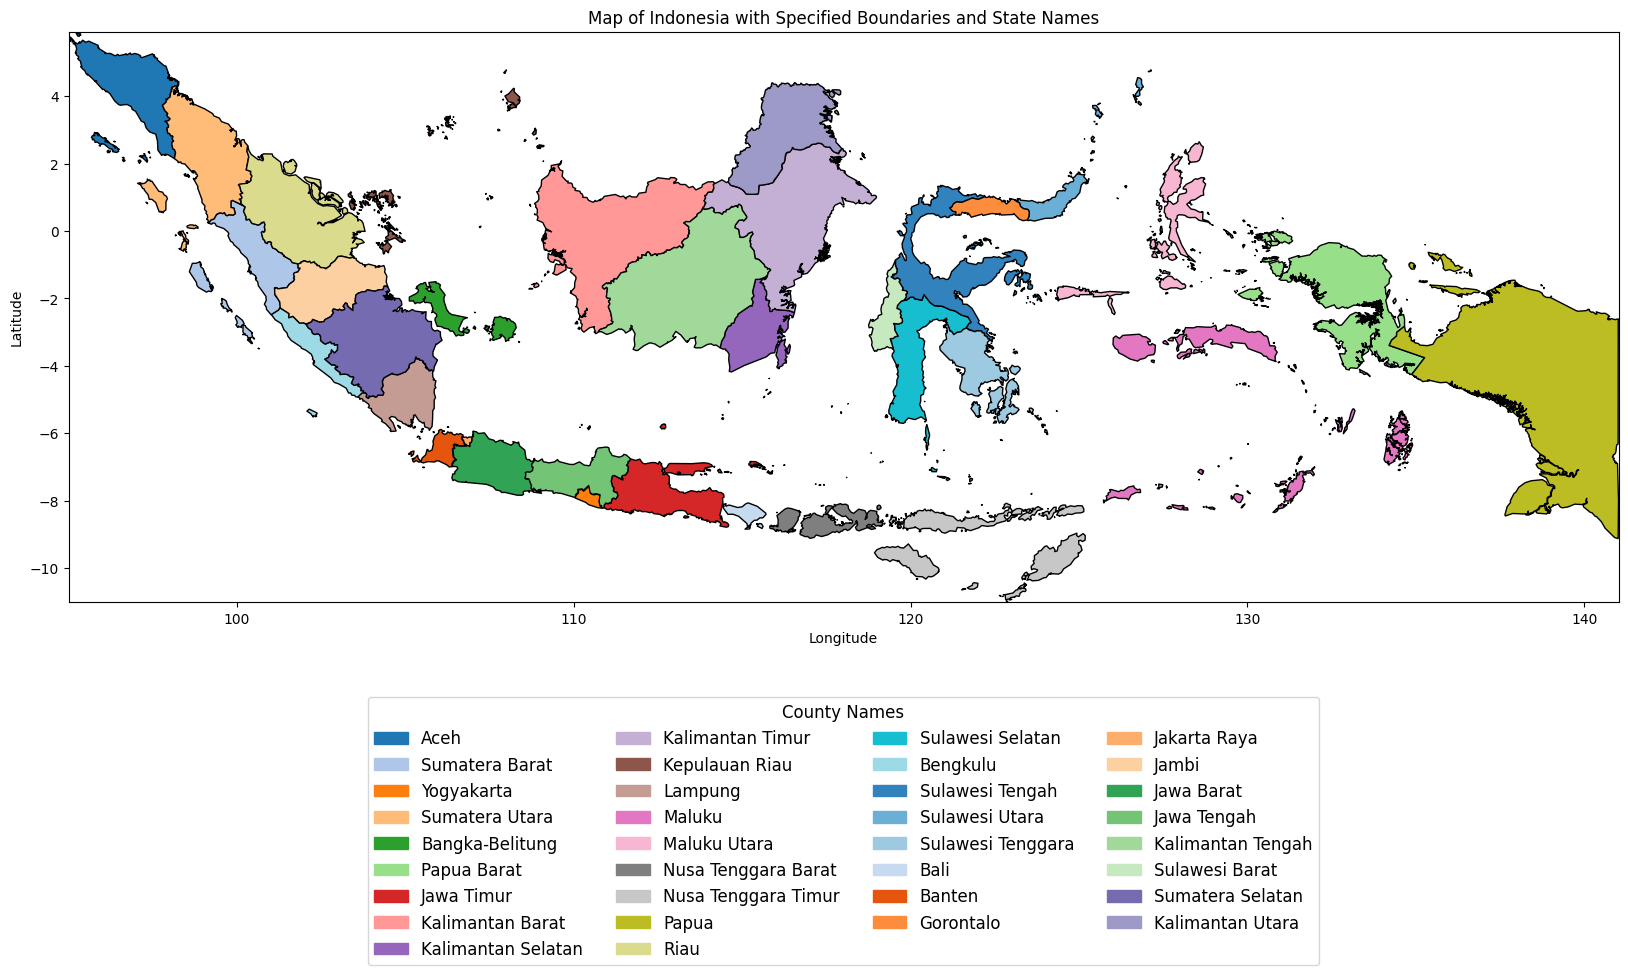

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
from matplotlib import cm, colors

# Load GeoJSON data
geojson_url = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Indonesia/indonesia.geojson"
indonesia_map = gpd.read_file(geojson_url)

# Get unique county names and count
county_names = indonesia_map['state'].unique()
num_counties = len(county_names)

# Generate a colormap with a unique color for each county name
cmap = colors.ListedColormap(cm.tab20.colors + cm.tab20c.colors + cm.tab20b.colors, name='tab60')
colors = cmap(range(num_counties))
county_color_map = {name: color for name, color in zip(county_names, colors)}

# Plot the map
fig, ax = plt.subplots(figsize=(20, 15))

# Plot each county with a different color
for name in county_names:
    county_data = indonesia_map[indonesia_map['state'] == name]
    county_data.plot(ax=ax, color=county_color_map[name], edgecolor='black', label=name)

# Set the limits for longitude and latitude
min_lat, min_lon = indonesia_map.total_bounds[1], indonesia_map.total_bounds[0]
max_lat, max_lon = indonesia_map.total_bounds[3], indonesia_map.total_bounds[2]
ax.set_xlim(min_lon, max_lon)
ax.set_ylim(min_lat, max_lat)

# Create legend patches and labels
legend_patches = [Patch(color=county_color_map[name], label=name) for name in county_names]

# Add legend outside the plot with 4 columns
ax.legend(handles=legend_patches, title='County Names', title_fontsize='large', fontsize='large', loc='lower center', bbox_to_anchor=(0.5, -0.65), ncol=4)

# Add labels and title
plt.title('Map of Indonesia with Specified Boundaries and State Names')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


# **Load Dataset Gempa Bumi**
Load Dataset Kejadian Gempa Bumi yang bersumber dari United States Geological Survey (USGS). Untuk Wilayah Negara Indonesia yang diambil dari tahun 1964 hingga 2023

In [ ]:
dataset1 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Indonesia/Indonesia_EQ_Part_1.csv"
dataset2 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Indonesia/Indonesia_EQ_Part_2.csv"
dataset3 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Indonesia/Indonesia_EQ_Part_3.csv"
dataset4 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Indonesia/Indonesia_EQ_Part_4.csv"
dataset5 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Indonesia/Indonesia_EQ_Part_5.csv"

# Load each dataset
df1 = pd.read_csv(dataset1)
df2 = pd.read_csv(dataset2)
df3 = pd.read_csv(dataset3)
df4 = pd.read_csv(dataset4)
df5 = pd.read_csv(dataset5)

# Concatenate the datasets
merged_df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

# Display the merged DataFrame
merged_df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1994-12-31T11:05:59.870Z,2.475,126.188,86.8,5.2,mb,NaN,NaN,NaN,0.7,...,2014-11-07T00:57:00.923Z,"173 km NE of Laikit, Laikit II (Dimembe), Indo...",earthquake,NaN,8.6,NaN,16.0,reviewed,us,us
1,1994-12-30T21:28:48.450Z,-5.092,103.514,99.0,5.1,mb,NaN,NaN,NaN,1.0,...,2014-11-07T00:57:00.847Z,"121 km SSE of Pagar Alam, Indonesia",earthquake,NaN,21.7,NaN,19.0,reviewed,us,us
2,1994-12-30T03:46:35.310Z,-9.697,124.116,78.5,4.8,mb,NaN,NaN,NaN,1.3,...,2014-11-07T00:57:00.717Z,"25 km NW of Soe, Indonesia",earthquake,NaN,21.7,NaN,4.0,reviewed,us,us
3,1994-12-29T06:15:10.280Z,-8.608,119.387,142.2,4.2,mb,NaN,NaN,NaN,1.4,...,2014-11-07T00:57:00.590Z,"11 km W of Komodo, Indonesia",earthquake,NaN,15.8,NaN,2.0,reviewed,us,us
4,1994-12-29T04:33:53.090Z,-5.112,102.689,60.7,5.4,mb,NaN,NaN,NaN,0.9,...,2022-04-28T17:19:32.470Z,"135 km SSW of Pagar Alam, Indonesia",earthquake,NaN,11.7,NaN,30.0,reviewed,us,us


In [ ]:
# importing libraries
import pandas as pd # Reading csv file
from shapely.geometry import Point # Shapely for converting latitude/longtitude to geometry
import geopandas as gpd # To create GeodataFrame

df = merged_df

# creating a geometry column
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]

# Coordinate reference system : WGS84
crs = {'init': 'epsg:4326'}

# Creating a Geographic data frame
gdf = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

gdf.head(10)

df=gdf

# Konversi kolom 'time' ke format datetime
df['time'] = pd.to_datetime(df['time'])

# Seleksi data hanya untuk tahun 1968 - 2018
#df_selected = df[(df['time'].dt.year >= 1968) & (df['time'].dt.year <= 2018)].copy()

df_selected = df

# Memperbarui kolom 'city' dengan menggunakan .loc
df_selected['city'] = df_selected['place'].str.split(',').str[0].str.split('of').str[-1].str.strip()

df_selected['year'] = df_selected['time'].dt.year
# Ubah format kolom 'time' menjadi YYYY-MM-DD
df_selected['time'] = df_selected['time'].dt.strftime('%Y-%m-%d')


# Mengambil hanya kolom yang diinginkan
df_selected = df_selected[['time','year' , 'latitude', 'longitude', 'place', 'city','depth', 'mag', 'magType','geometry']]
df_selected.head()

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,time,year,latitude,longitude,place,city,depth,mag,magType,geometry
0,1994-12-31,1994,2.475,126.188,"173 km NE of Laikit, Laikit II (Dimembe), Indo...",Laikit,86.8,5.2,mb,POINT (126.18800 2.47500)
1,1994-12-30,1994,-5.092,103.514,"121 km SSE of Pagar Alam, Indonesia",Pagar Alam,99.0,5.1,mb,POINT (103.51400 -5.09200)
2,1994-12-30,1994,-9.697,124.116,"25 km NW of Soe, Indonesia",Soe,78.5,4.8,mb,POINT (124.11600 -9.69700)
3,1994-12-29,1994,-8.608,119.387,"11 km W of Komodo, Indonesia",Komodo,142.2,4.2,mb,POINT (119.38700 -8.60800)
4,1994-12-29,1994,-5.112,102.689,"135 km SSW of Pagar Alam, Indonesia",Pagar Alam,60.7,5.4,mb,POINT (102.68900 -5.11200)


In [ ]:
# Group by 'city' and count earthquakes in each city
city_earthquake_counts = df_selected.groupby('place').size().reset_index(name='earthquake_count')

# Tampilkan tabel hasil grouping
print(city_earthquake_counts)


                                 place  earthquake_count
0        0 km E of Cibinong, Indonesia                 1
1       0 km ENE of Sibolga, Indonesia                 1
2       0 km ENE of Singkil, Indonesia                 1
3         0 km N of Bukid, Philippines                 1
4        0 km NE of Serpong, Indonesia                 1
...                                ...               ...
34057         south of Bali, Indonesia                 4
34058         south of Java, Indonesia               167
34059      south of Sumbawa, Indonesia                 5
34060      southern Sumatra, Indonesia                79
34061  southwest of Sumatra, Indonesia               212

[34062 rows x 2 columns]


In [ ]:
# Group by 'place' and calculate average magnitude in each place
place_avg_magnitude = df_selected.groupby('place')['mag'].mean().reset_index(name='avg_magnitude')

# Merge average magnitude with df_selected based on 'place'
df_moreselected = df_selected.merge(place_avg_magnitude, on='place', how='left')

# Tampilkan tabel hasil
df_moreselected.head()


,time,year,latitude,longitude,place,city,depth,mag,magType,geometry,avg_magnitude
0,1994-12-31,1994,2.475,126.188,"173 km NE of Laikit, Laikit II (Dimembe), Indo...",Laikit,86.8,5.2,mb,POINT (126.18800 2.47500),4.666667
1,1994-12-30,1994,-5.092,103.514,"121 km SSE of Pagar Alam, Indonesia",Pagar Alam,99.0,5.1,mb,POINT (103.51400 -5.09200),5.100000
2,1994-12-30,1994,-9.697,124.116,"25 km NW of Soe, Indonesia",Soe,78.5,4.8,mb,POINT (124.11600 -9.69700),4.800000
3,1994-12-29,1994,-8.608,119.387,"11 km W of Komodo, Indonesia",Komodo,142.2,4.2,mb,POINT (119.38700 -8.60800),4.200000
4,1994-12-29,1994,-5.112,102.689,"135 km SSW of Pagar Alam, Indonesia",Pagar Alam,60.7,5.4,mb,POINT (102.68900 -5.11200),4.871429


# **Spatial distribution**
Spatial Distribution merupakan pengamatan geografis kejadian gempa bumi di negara Indonesia berdasarkan nilai magnitudo di lokasi berdasarkan longitude dan latitude

In [ ]:
import pandas as pd
import folium

# URLs of the datasets
dataset1 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Indonesia/Indonesia_EQ_Part_1.csv"
dataset2 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Indonesia/Indonesia_EQ_Part_2.csv"
dataset3 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Indonesia/Indonesia_EQ_Part_3.csv"
dataset4 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Indonesia/Indonesia_EQ_Part_4.csv"
dataset5 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Indonesia/Indonesia_EQ_Part_5.csv"

# Load each dataset
df1 = pd.read_csv(dataset1)
df2 = pd.read_csv(dataset2)
df3 = pd.read_csv(dataset3)
df4 = pd.read_csv(dataset4)
df5 = pd.read_csv(dataset5)

# Concatenate the datasets
df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

# Convert latitude and longitude to numeric values (if not already)
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

# Filter out rows with missing coordinates
df = df.dropna(subset=['latitude', 'longitude'])

# Create a Folium map centered on Indonesia
m = folium.Map(location=[-2.5, 117], zoom_start=5)

# Define a function to get color based on magnitude
def get_color(magnitude):
    if magnitude < 3:
        return 'lightgreen'
    elif magnitude < 5:
        return 'orange'
    elif magnitude < 7:
        return 'red'
    else:
        return 'darkred'

# Add markers to the map
for idx, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        color=get_color(row['mag']),
        fill=True,
        fill_color=get_color(row['mag']),
        fill_opacity=0.6,
        popup=f"Time: {row['time']}<br>Magnitude: {row['mag']}<br>Depth: {row['depth']} km<br>Location: {row['place']}"
    ).add_to(m)

# Create a legend
legend_html = '''
<div style="position: fixed;
            bottom: 50px; left: 50px; width: 150px; height: 180px;
            border:2px solid grey; z-index:9999; font-size:14px;
            background-color:white;
            opacity: 0.8;
            ">
     <p style="margin-top: 5px; margin-left: 5px;">Magnitude Legend</p>
     <p style="margin-left: 10px; font-size: 16px; color: lightgreen;">0-3</p>
     <p style="margin-left: 10px; font-size: 16px; color: orange;">3-5</p>
     <p style="margin-left: 10px; font-size: 16px; color: red;">5-7</p>
     <p style="margin-left: 10px; font-size: 16px; color: darkred;">7+</p>
</div>
'''

# Add legend to map
m.get_root().html.add_child(folium.Element(legend_html))

# Display map
m


/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


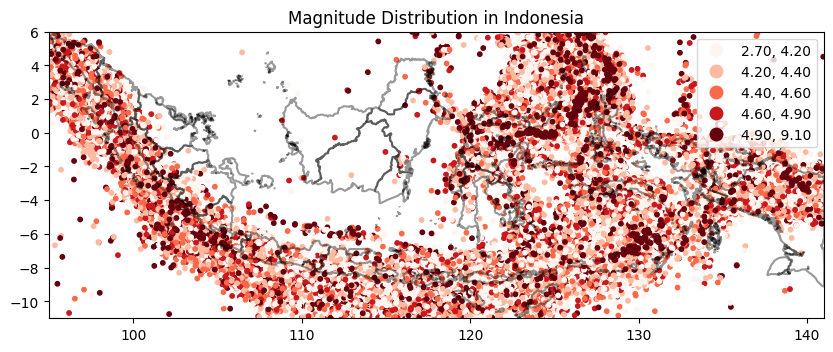

In [ ]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt

# URLs of the datasets
dataset1 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Indonesia/Indonesia_EQ_Part_1.csv"
dataset2 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Indonesia/Indonesia_EQ_Part_2.csv"
dataset3 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Indonesia/Indonesia_EQ_Part_3.csv"
dataset4 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Indonesia/Indonesia_EQ_Part_4.csv"
dataset5 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Indonesia/Indonesia_EQ_Part_5.csv"

# Load each dataset
df1 = pd.read_csv(dataset1)
df2 = pd.read_csv(dataset2)
df3 = pd.read_csv(dataset3)
df4 = pd.read_csv(dataset4)
df5 = pd.read_csv(dataset5)

# Concatenate the datasets
df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

# Convert latitude and longitude to numeric values (if not already)
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

# Baca GeoDataFrame dari URL GeoJSON
geojson_url = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Indonesia/indonesia.geojson"
gdf_boundary = gpd.read_file(geojson_url)

# Membuat geometry column
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]

# Coordinate reference system : WGS84
crs = {'init': 'epsg:4326'}

# Membuat Geographic DataFrame
gdf = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

# Mengambil hanya kolom yang diinginkan
gdf = gdf[['time', 'latitude', 'longitude', 'place', 'depth', 'mag', 'magType', 'geometry']]

# Menentukan warna dan skema pengisian
cmap = "Reds"  # Palet warna
column = "mag"  # Kolom untuk pengisian
scheme = "quantiles"  # Skema pengisian (quantiles)

# Membuat peta menggunakan matplotlib
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting data gdf
gdf.plot(column=column, cmap=cmap, scheme=scheme, legend=True, ax=ax, markersize=10)

# Plotting batas menggunakan gdf_boundary
gdf_boundary.boundary.plot(ax=ax, color='black', alpha=0.4)

# Menentukan batas longitude dan latitude
ax.set_xlim(95, 141)
ax.set_ylim(-11, 6)

# Menambahkan judul
plt.title("Magnitude Distribution in Indonesia")

# Menampilkan peta
plt.show()


# **Statistics**
Analisis statistik kejadian gempa bumi berdasarkan rentang magnitudo tertentu

In [ ]:
df_selected = df
# Define the magnitude ranges
mag_ranges = [(2, 3.9), (4, 4.9), (5, 5.9), (6, 9.9)]

# Initialize an empty list to store the statistics
statistics = []

# Calculate statistics for each magnitude range
for mag_range in mag_ranges:
    min_mag, max_mag = mag_range
    subset = df_selected[(df_selected['mag'] >= min_mag) & (df_selected['mag'] <= max_mag)]
    total = len(subset)
    percentage = (total / len(df_selected)) * 100
    min_magnitude = subset['mag'].min()
    max_magnitude = subset['mag'].max()
    mean_magnitude = subset['mag'].mean()
    sd_magnitude = subset['mag'].std()
    statistics.append({
        'Magnitude Earthquake': f"{min_mag}≤M≤{max_mag}",
        'Total': total,
        '% earthquake': percentage,
        'Minimum Magnitude': min_magnitude,
        'Maximum Magnitude': max_magnitude,
        'Mean Magnitude': mean_magnitude,
        'SD Magnitude': sd_magnitude
    })

# Create a DataFrame from the statistics
statistics_df = pd.DataFrame(statistics)

# Print the statistics table
print("Table 1. Statistic table of earthquakes")
statistics_df

Table 1. Statistic table of earthquakes


,Magnitude Earthquake,Total,% earthquake,Minimum Magnitude,Maximum Magnitude,Mean Magnitude,SD Magnitude
0,2≤M≤3.9,3332,4.844220,2.7,3.9,3.738349,0.186494
1,4≤M≤4.9,53041,77.113531,4.0,4.9,4.442661,0.255084
2,5≤M≤5.9,11407,16.584040,5.0,5.9,5.256374,0.246756
3,6≤M≤9.9,973,1.414594,6.0,9.1,6.389188,0.431015


# **Global Spatial Autocorrelation**
Indeks Moran adalah pengukuran autokorelasi spasial secara global yang digunakan untuk menganalisis hubungan spasial pada suatu kejadian

In [ ]:
import pandas as pd
from libpysal import weights
from esda.moran import Moran

# Buat geometri kolom menggunakan longitude dan latitude
df['geometry'] = df.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

# Bangun matriks spatialis
w = weights.KNN.from_dataframe(df, k=1)

# Periksa apakah matriks bobot terhubung sepenuhnya
if not w.islands:
    print("Matriks bobot terhubung sepenuhnya.")
else:
    print("Matriks bobot tidak sepenuhnya terhubung. Ada komponen yang tidak terhubung.")

# Hitung Moran's I
moran = Moran(df['mag'], w)

# Print Moran's I
print("Moran's I:", moran.I)
print("P-value:", moran.p_sim)


/usr/local/lib/python3.10/dist-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 21178 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


Matriks bobot terhubung sepenuhnya.
Moran's I: 0.09812201527763444
P-value: 0.001


# **Moran’s I Statistik**

$$
I = \frac{\sum_{i} \sum_{j} w_{ij} z_i z_j}{S_0 \sum_{i} z_i^2 / n}
$$

dengan
$w_{ij}$ adalah sebagai elemen dari matriks bobot spasial
$S_0 = \sum_{i} \sum_{j} w_{ij}$ sebagai jumlah dari semua bobot, dan
$n$ jumlah pengamatan.


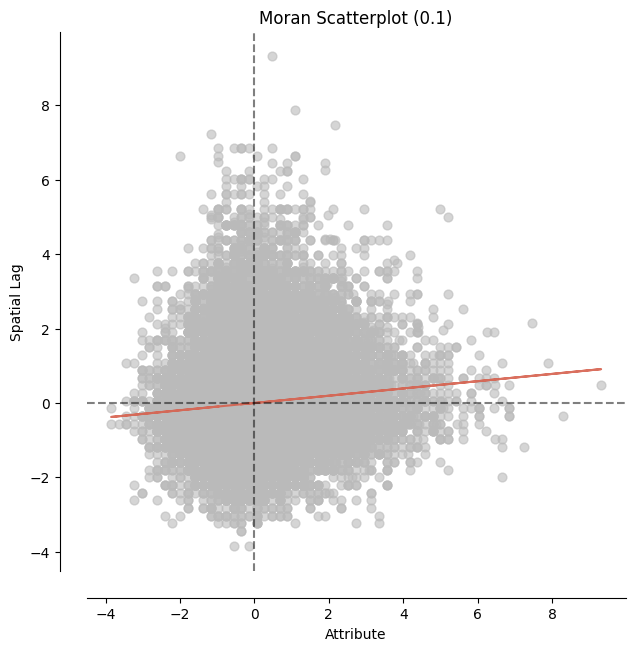

In [ ]:
from splot.esda import moran_scatterplot

# Buat Moran Scatter plot
fig, ax = moran_scatterplot(moran, zstandard=True)
plt.show()


Dalam kasus ini, nilai 0.1 menunjukkan bahwa nilai autokorelasi spasial positif dalam data. Artinya, ada kecenderungan nilai yang mirip untuk berdekatan satu sama lain, tetapi pengaruhnya tidak terlalu kuat.

**Positif (> 0)**: Menunjukkan autokorelasi spasial positif, di mana HH dan LL lebih dominan.

*   Quadrant I (HH): Menunjukkan daerah dengan nilai tinggi yang dikelilingi oleh nilai tinggi.
*   Quadrant II (LH): Menunjukkan daerah dengan nilai rendah yang dikelilingi oleh nilai tinggi.
*   Quadrant III (LL): Menunjukkan daerah dengan nilai rendah yang dikelilingi oleh nilai rendah.
*   Quadrant IV (HL): Menunjukkan daerah dengan nilai tinggi yang dikelilingi oleh nilai rendah.

# **Pola Sebaran**

**Cluster**

*   Definisi: Pola kluster terjadi ketika kejadian (gempa bumi) terkumpul di sekitar area tertentu, menciptakan daerah dengan densitas tinggi.
*   Visualisasi: Pada peta, kluster akan terlihat sebagai kumpulan titik yang terkonsentrasi di wilayah tertentu.

**Random**

*   Definisi: Pola acak terjadi ketika kejadian tersebar tanpa pola yang jelas atau terstruktur, menunjukkan tidak adanya faktor lokal yang signifikan.
*   Visualisasi: Pada peta, titik akan tersebar secara merata tanpa ada konsentrasi di area tertentu.

**Dispersed (Tersebar)**

*   Definisi: Pola tersebar terjadi ketika kejadian secara konsisten tersebar di seluruh area, seringkali dengan jarak yang relatif sama antar kejadian.
*   Visualisasi: Pada peta, titik akan terlihat tersebar dengan jarak yang relatif konsisten antara satu dengan yang lain.

In [ ]:
import pandas as pd
from libpysal import weights
from esda.moran import Moran
from shapely.geometry import Point

# Buat kolom geometri menggunakan longitude dan latitude
df['geometry'] = df.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

# Bangun matriks spatialis untuk seluruh data
w = weights.KNN.from_dataframe(df, k=1)

# Periksa apakah matriks bobot terhubung sepenuhnya
if not w.islands:
    print("Matriks bobot terhubung sepenuhnya.")
else:
    print("Matriks bobot tidak sepenuhnya terhubung. Ada komponen yang tidak terhubung.")

# Mendefinisikan fungsi untuk menghitung Moran's I berdasarkan rentang magnitude
def calculate_moran_i(df, mag_range):
    df_subset = df[(df['mag'] >= mag_range[0]) & (df['mag'] < mag_range[1])]
    # Periksa apakah ada observasi di subset data
    if len(df_subset) > 0:
        w_subset = weights.KNN.from_dataframe(df_subset, k=1)
        moran_subset = Moran(df_subset['mag'], w_subset)
        return moran_subset
    else:
        return None

# Hitung Moran's I untuk setiap rentang magnitude
magnitude_ranges = [(2, 3.9), (4, 4.9), (5, 5.9), (6, 9.9), (2, 9.9)]
moran_results = {}
for mag_range in magnitude_ranges:
    moran_result = calculate_moran_i(df, mag_range)
    if moran_result:
        moran_results[mag_range] = moran_result

# Buat dataframe dari hasil analisis Moran's I
data = []
for mag_range, moran_result in moran_results.items():
    # Tentukan Pattern Type berdasarkan p-value
    pattern_type = "Random" if moran_result.p_sim >= 0.05 else "Clustered"
    data.append({
        'Magnitude Range': f"{mag_range[0]}≤M<{mag_range[1]}",
        "Moran's I": moran_result.I,
        'P-value': moran_result.p_sim,
        'Z Statistic': moran_result.z_sim,
        'Pattern Type': pattern_type
    })

df_result = pd.DataFrame(data)

# Tampilkan dataframe
df_result


/usr/local/lib/python3.10/dist-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 21178 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 640 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


Matriks bobot terhubung sepenuhnya.


/usr/local/lib/python3.10/dist-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 15234 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 3364 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 279 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


,Magnitude Range,Moran's I,P-value,Z Statistic,Pattern Type
0,2≤M<3.9,0.078034,0.003,2.824122,Clustered
1,4≤M<4.9,0.050014,0.001,8.730383,Clustered
2,5≤M<5.9,0.067805,0.001,5.423080,Clustered
3,6≤M<9.9,-0.036530,0.192,-0.879973,Random
4,2≤M<9.9,0.098122,0.001,20.069670,Clustered


# **Analysis Result of Average Nearest Neighbor**

In [ ]:
from pysal.lib import weights
from esda import Moran_Local

df_selected = df

# Define the magnitude ranges
mag_ranges = [(2, 3.9), (4, 4.9), (5, 5.9), (6, 9.9)]

# Initialize an empty list to store the analysis results
analysis_results = []

# Calculate Average Nearest Neighbor (ANN) for each magnitude range
for min_mag, max_mag in mag_ranges:
    subset = df_selected[(df_selected['mag'] >= min_mag) & (df_selected['mag'] <= max_mag)]
    try:
        w = weights.KNN.from_dataframe(subset, k=1)
        local_moran = Moran_Local(subset['mag'], w)
        avg_nearest_neighbor = local_moran.Is.mean()
        z_statistic = local_moran.z.mean()
        p_value = local_moran.p_sim.mean()
        pattern_type = "Clustered" if (z_statistic < 0) else "Dispersed"
    except ValueError:
        avg_nearest_neighbor = 0
        z_statistic = 0
        p_value = 1
        pattern_type = "Insufficient neighbors"
    analysis_results.append({
        'Magnitude': f"{min_mag}≤M≤{max_mag}",
        'Average Nearest Neighbor': avg_nearest_neighbor,
        'Z Statistic': z_statistic,
        'P value': p_value,
        'Pattern type': pattern_type
    })

# Create a DataFrame from the analysis results
analysis_results_df = pd.DataFrame(analysis_results)

# Print the analysis results table
print("Table 2. Analysis Result of Average Nearest Neighbor")
analysis_results_df


/usr/local/lib/python3.10/dist-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 1007 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 16301 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 3446 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


Table 2. Analysis Result of Average Nearest Neighbor


/usr/local/lib/python3.10/dist-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 279 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


,Magnitude,Average Nearest Neighbor,Z Statistic,P value,Pattern type
0,2≤M≤3.9,0.104971,1.642011e-15,0.246422,Dispersed
1,4≤M≤4.9,0.055187,-2.464883e-15,0.258487,Clustered
2,5≤M≤5.9,0.077967,9.916578e-16,0.220567,Dispersed
3,6≤M≤9.9,-0.036492,-5.842078e-17,0.257202,Clustered


# **Analysis result of Getis-Ord general**
Analisis Hot Spot menghitung statistik Getis-Ord Gi* untuk setiap fitur dalam kumpulan data. Skor-z dan nilai-p yang dihasilkan untuk mengetahui di mana fitur dengan nilai tinggi atau rendah mengelompok secara spasial

# Getis-Ord General G

The Getis-Ord General G statistic is defined as:

$$
G = \frac{\sum_{i=1}^{n}\sum_{j=1}^{n} w_{ij} x_i x_j}{\sum_{i=1}^{n} x_i^2}
$$

Where:
- $w_{ij}$ is the spatial weight between location $i$ and $j$
- $x_i$ is the attribute value at location $i$
- $n$ is the number of observations

## Keterangan

The Getis-Ord General G statistic measures the degree of clustering for high values (hot spots) or low values (cold spots) over the study area. A high value of G indicates clustering of high values, while a low value of G indicates clustering of low values.

- **Spatial Weights Matrix $w_{ij}$**: Defines the spatial relationships between each pair of locations. It can be binary (1 if neighbors, 0 otherwise) or based on distance.
- **Attribute Value $x_i$**: The value of the variable of interest at location \( i \).
- **Number of Observations $n$**: The total number of locations in the study area.

The General G statistic can be interpreted as follows:
- **High G**: Indicates significant clustering of high values.
- **Low G**: Indicates significant clustering of low values.
- **Near Zero G**: Indicates a random spatial pattern with no significant clustering of high or low values.




In [ ]:
import pandas as pd
from libpysal import weights
from esda.getisord import G_Local
from shapely.geometry import Point

# Buat kolom geometri menggunakan longitude dan latitude
df['geometry'] = df.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

# Mendefinisikan fungsi untuk menghitung Getis-Ord General Index berdasarkan rentang magnitude
def calculate_getisord_index(df, mag_range):
    df_subset = df[(df['mag'] >= mag_range[0]) & (df['mag'] <= mag_range[1])]
    # Periksa apakah ada data dalam subset
    if df_subset.shape[0] > 0:  # Gunakan 'shape[0]' untuk mendapatkan jumlah baris DataFrame
        # Bangun matriks spatialis untuk subset data
        w_subset = weights.KNN.from_dataframe(df_subset, k=1)
        # Hitung Getis-Ord General Index
        glocal = G_Local(df_subset['mag'], w_subset)
        return glocal
    else:
        print(f"No data found for magnitude range {mag_range}")
        return None

# Hitung Getis-Ord General Index untuk setiap rentang magnitude
magnitude_ranges = [(2, 3.9), (4, 4.9), (5, 5.9), (6, 9.9), (2, 9.9)]
getisord_results = {}
for mag_range in magnitude_ranges:
    getisord_result = calculate_getisord_index(df, mag_range)
    if getisord_result is not None:  # Periksa jika hasilnya tidak None
        getisord_results[mag_range] = getisord_result

# Buat dataframe dari hasil analisis Getis-Ord General Index
data = []
for mag_range, getisord_result in getisord_results.items():
    # Ambil nilai indeks, Z Statistic, dan p-value untuk setiap baris yang Highly Clustered
    for i in range(len(getisord_result.z_sim)):
        if getisord_result.p_sim[i] < 0.05:  # Filter hanya untuk Highly Clustered
            data.append({
                'Magnitude Range': f"{mag_range[0]}≤M≤{mag_range[1]}",
                'Getis-Ord General Index': getisord_result.Gs[i],
                'Index Z Statistic': getisord_result.z_sim[i],
                'P-value': getisord_result.p_sim[i],
                'Pattern Type': "Highly Clustered"
            })

df_result = pd.DataFrame(data)

# Tampilkan dataframe
print("Table of Analysis result of Getis-Ord General")
df_result

/usr/local/lib/python3.10/dist-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 1007 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 16301 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 3446 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 279 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/distance.py:153: UserWarning: The weigh

Table of Analysis result of Getis-Ord General


,Magnitude Range,Getis-Ord General Index,Index Z Statistic,P-value,Pattern Type
0,2≤M≤3.9,0.000257,-2.857904,0.018,Highly Clustered
1,2≤M≤3.9,0.000265,-2.338191,0.026,Highly Clustered
2,2≤M≤3.9,0.000265,-2.337992,0.026,Highly Clustered
3,2≤M≤3.9,0.000273,-1.806073,0.046,Highly Clustered
4,2≤M≤3.9,0.000257,-2.863345,0.018,Highly Clustered
...,...,...,...,...,...
13006,2≤M≤9.9,0.000011,-2.403164,0.002,Highly Clustered
13007,2≤M≤9.9,0.000026,7.557381,0.001,Highly Clustered
13008,2≤M≤9.9,0.000018,2.203588,0.033,Highly Clustered
13009,2≤M≤9.9,0.000018,2.577108,0.025,Highly Clustered


# **KDE**
Metode Kernel Density Estimation (KDE). Rumus umum untuk menghitung kepadatan di suatu titik \( x \) dengan menggunakan KDE adalah sebagai berikut:

$
\
\hat{f}(x) = \frac{1}{nh} \sum_{i=1}^{n} K\left( \frac{x - x_i}{h} \right)
\
$

di mana:

- $\hat{f}(x)$ adalah estimasi kepadatan di titik \( x \),
- $n$ adalah jumlah titik data,
- $x_i$ adalah titik data ke-i,
- $K$ adalah fungsi kernel,
- $h$ adalah bandwidth (lebar jendela) yang mengontrol seberapa estimasi kepadatan yang dihasilkan.




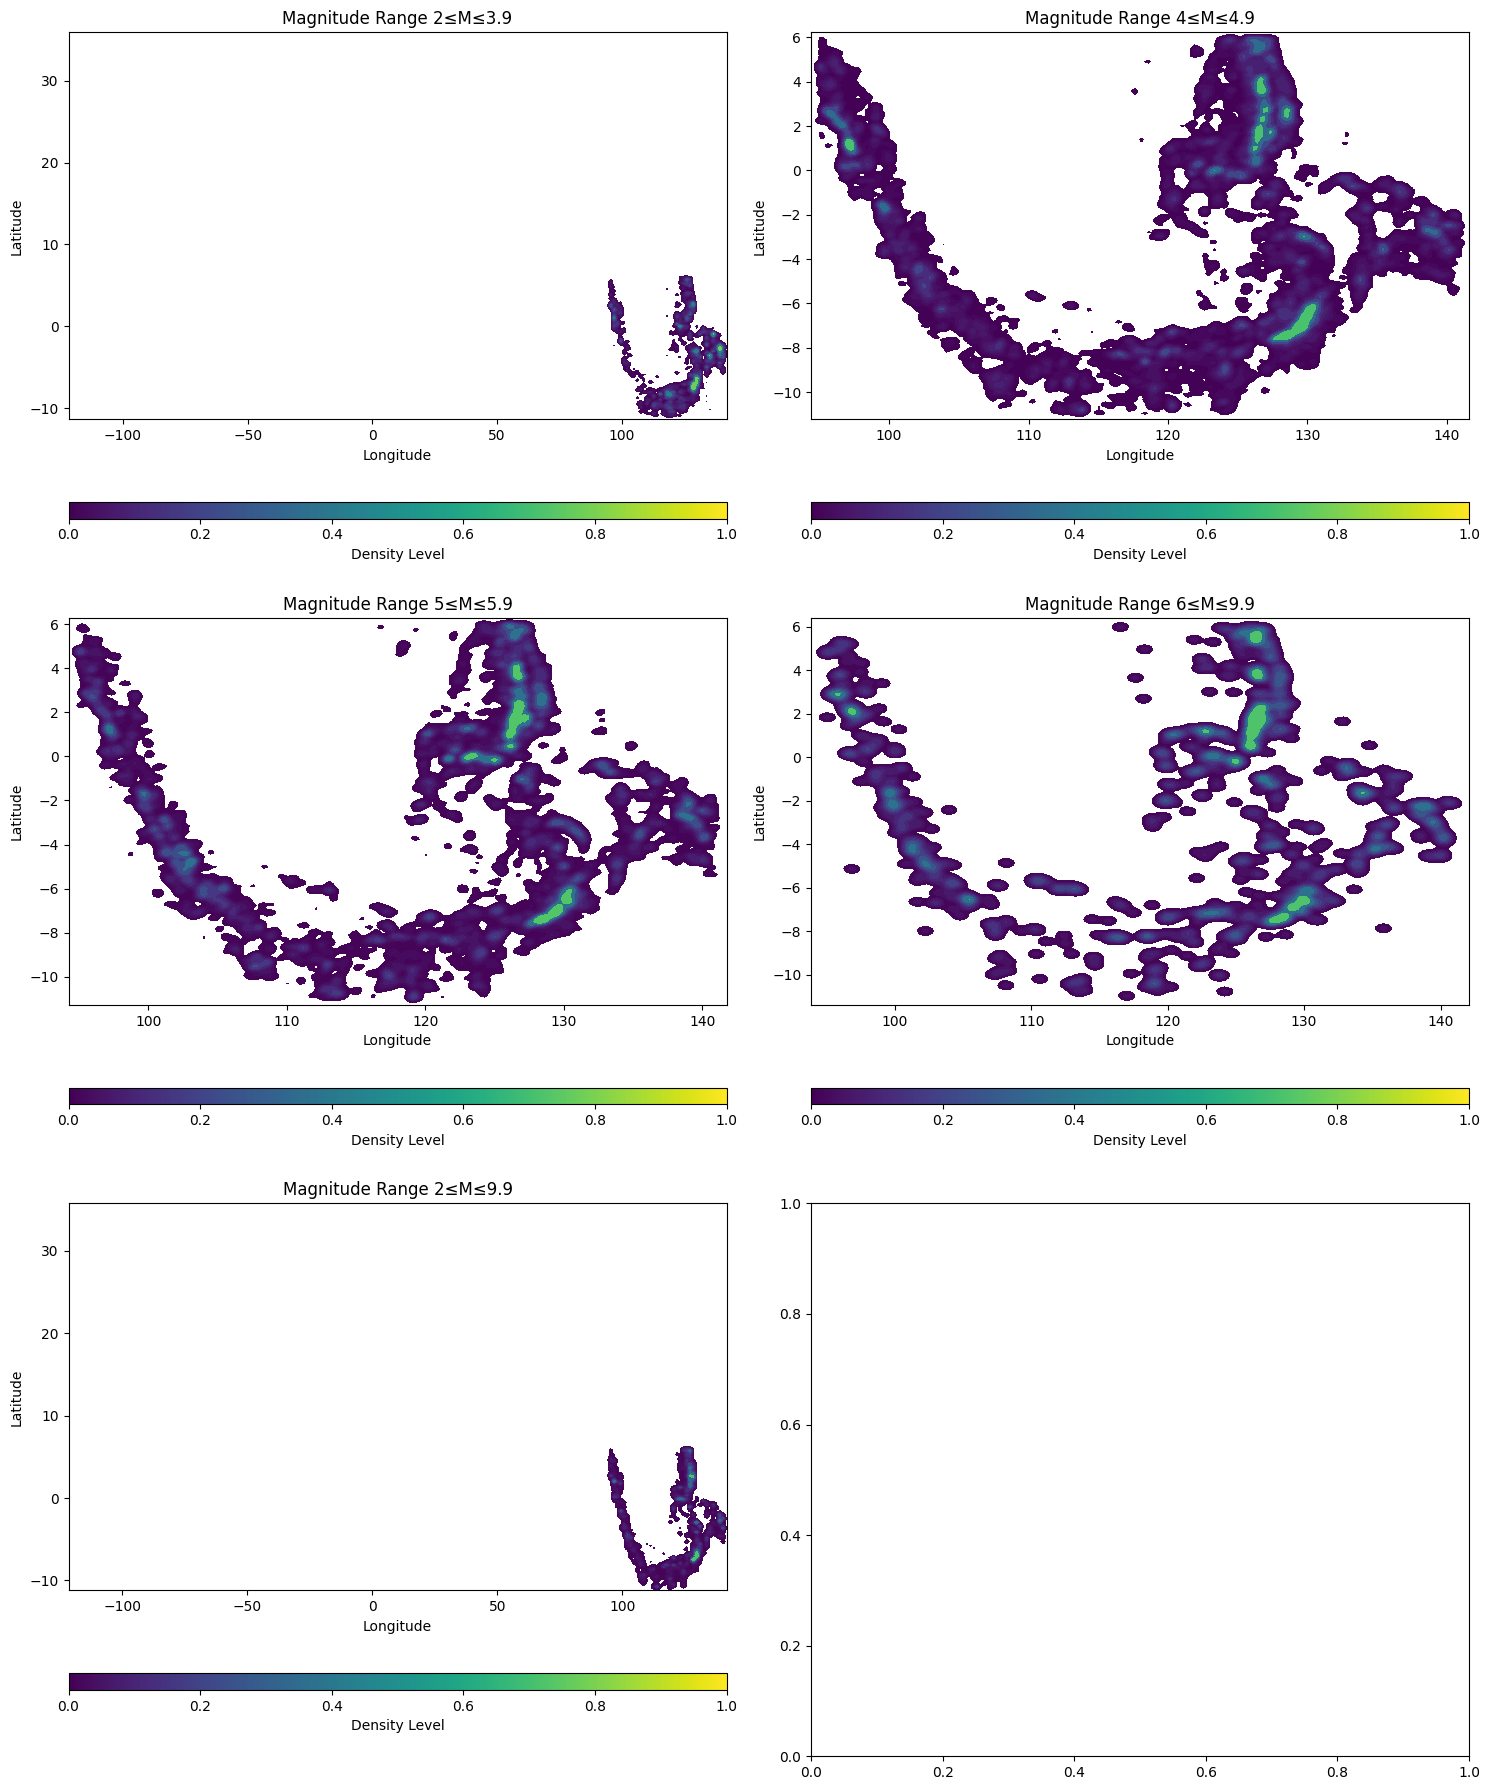

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definisikan rentang magnitudo
magnitude_ranges = [(2, 3.9), (4, 4.9), (5, 5.9), (6, 9.9), (2, 9.9)]

# Hitung jumlah baris dan kolom yang dibutuhkan
num_rows = (len(magnitude_ranges) + 1) // 2
num_cols = 2

# Buat subplot
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 6*num_rows))

# Iterasi melalui rentang magnitudo dan plot di setiap subplot
for i, mag_range in enumerate(magnitude_ranges):
    # Filter data berdasarkan rentang magnitudo
    df_subset = df[(df['mag'] >= mag_range[0]) & (df['mag'] <= mag_range[1])]

    # Hitung indeks subplot
    row = i // 2
    col = i % 2

    # Plot KDE pada subplot yang sesuai
    kde = sns.kdeplot(x=df_subset['longitude'], y=df_subset['latitude'], cmap='viridis', fill=True, bw_adjust=0.1, ax=axes[row, col])

    # Atur judul subplot
    axes[row, col].set_title(f'Magnitude Range {mag_range[0]}≤M≤{mag_range[1]}')
    axes[row, col].set_xlabel('Longitude')
    axes[row, col].set_ylabel('Latitude')

    # Tambahkan legenda hanya jika plot KDE berhasil dibuat
    if kde.collections:
        cb = fig.colorbar(kde.collections[0], ax=axes[row, col], orientation='horizontal', aspect=40)
        cb.set_label('Density Level')

# Atur layout subplot
plt.tight_layout()

# Tampilkan plot
plt.show()


# **Local Autocorrelation**

/usr/local/lib/python3.10/dist-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 21178 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


Moran's I: 0.09812201527763444


<Figure size 1500x800 with 0 Axes>

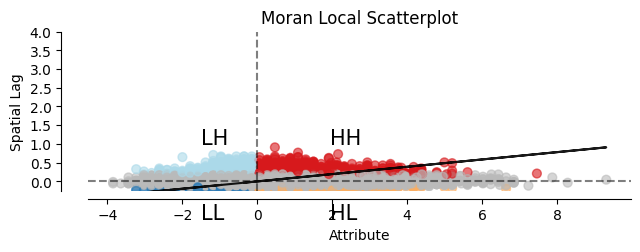

In [ ]:
from splot.esda import moran_scatterplot
import matplotlib.pyplot as plt
import libpysal.weights as weights
import esda.moran

# Menghilangkan nilai yang hilang
df_selected = df_selected.dropna(subset=['mag'])

# Membuat matriks bobot spasial
w = weights.KNN.from_dataframe(df_selected, k=1)

# Menghitung Moran's I
y_mag = df_selected['mag']
moran = esda.moran.Moran(y_mag, w)

# Mencetak hasil Moran's I
print("Moran's I:", moran.I)

# Local Moran's I
mag_local_moran = esda.moran.Moran_Local(y_mag, w)

# Plotting Local Moran's I scatterplot
plt.figure(figsize=(15, 8))  # Atur ukuran plot di sini
moran_scatterplot(mag_local_moran, p=0.05)

# Mengatur langkah (step) sumbu y
plt.ylim(-0.25, 4)
plt.yticks([i * 0.5 for i in range(9)])

# Tambahkan keterangan
plt.text(1.95, 1, 'HH', fontsize=15)
plt.text(1.95, -1.0, 'HL', fontsize=15)
plt.text(-1.5, 1, 'LH', fontsize=15)
plt.text(-1.5, -1, 'LL', fontsize=15)

plt.show()


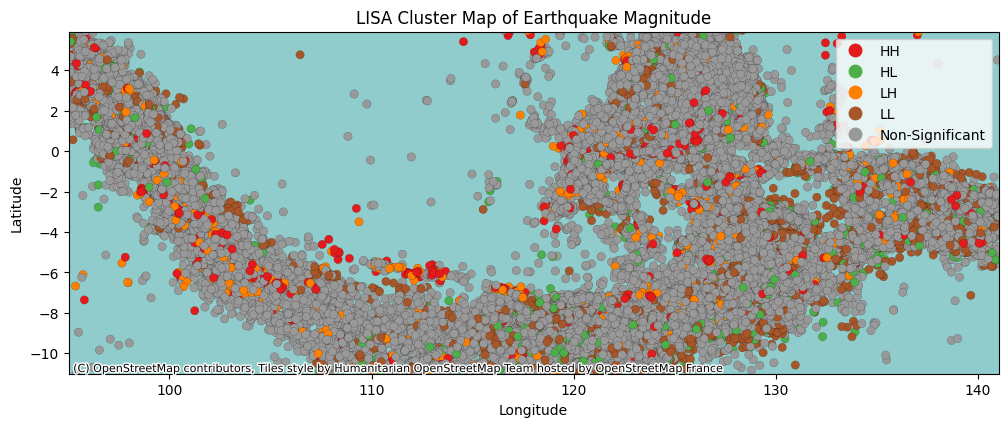

In [ ]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from esda.moran import Moran_Local
import libpysal as ps
from splot.esda import lisa_cluster
import contextily as ctx

# Assuming combined_df is already loaded and processed

combined_df = df_selected

# Drop rows with missing Magnitude values
combined_df = combined_df.dropna(subset=['mag'])

# Create a spatial weights matrix using KNN
w = ps.weights.KNN.from_dataframe(combined_df, k=8)  # Adjust k as needed

# Calculate Local Moran's I
y_mag = combined_df['mag']
moran_local = Moran_Local(y_mag, w)

# Add Moran's I results to the dataframe
combined_df['moran_local'] = moran_local.Is
combined_df['p_value'] = moran_local.p_sim

# Define clusters based on Local Moran's I results
combined_df['cluster'] = 'Non-Significant'
combined_df.loc[(moran_local.q == 1) & (moran_local.p_sim <= 0.05), 'cluster'] = 'HH'
combined_df.loc[(moran_local.q == 2) & (moran_local.p_sim <= 0.05), 'cluster'] = 'LH'
combined_df.loc[(moran_local.q == 3) & (moran_local.p_sim <= 0.05), 'cluster'] = 'LL'
combined_df.loc[(moran_local.q == 4) & (moran_local.p_sim <= 0.05), 'cluster'] = 'HL'

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(combined_df, geometry=gpd.points_from_xy(combined_df.longitude, combined_df.latitude))

# Plotting LISA cluster map
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

gdf.plot(column='cluster', categorical=True,
         cmap='Set1', linewidth=0.1, ax=ax, edgecolor='black', legend=True)

# Add tile map for geographic context
try:
    ctx.add_basemap(ax, zoom=7, crs=gdf.crs)
except KeyError as e:
    print(f"KeyError: {e}")
    print("Available providers:", list(ctx.providers.keys()))

# Set map bounds
ax.set_xlim(min_lon, max_lon)
ax.set_ylim(min_lat, max_lat)

# Add title and labels
plt.title('LISA Cluster Map of Earthquake Magnitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()
